In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Loan Delinquent Dataset.csv')

In [3]:
df.shape

(11548, 9)

In [4]:
df.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500


In [5]:
df.sample(5)

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
3813,3814,Yes,1,36 months,Female,House,Own,>25,300-500
11146,11147,Yes,1,36 months,Male,House,Rent,20-25,300-500
4008,4009,Yes,1,36 months,Female,House,Rent,>25,300-500
4898,4899,Yes,1,36 months,Male,House,Mortgage,20-25,>500
3893,3894,No,0,36 months,Female,House,Mortgage,>25,>500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   delinquent      11548 non-null  object
 2   Sdelinquent     11548 non-null  int64 
 3   term            11548 non-null  object
 4   gender          11548 non-null  object
 5   purpose         11548 non-null  object
 6   home_ownership  11548 non-null  object
 7   age             11548 non-null  object
 8   FICO            11548 non-null  object
dtypes: int64(2), object(7)
memory usage: 812.1+ KB


In [7]:
df.isnull()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
11543,False,False,False,False,False,False,False,False,False
11544,False,False,False,False,False,False,False,False,False
11545,False,False,False,False,False,False,False,False,False
11546,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

ID                0
delinquent        0
Sdelinquent       0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

In [9]:
df.describe()

,ID,Sdelinquent
count,11548.000000,11548.000000
mean,5774.500000,0.668601
std,3333.764789,0.470737
min,1.000000,0.000000
25%,2887.750000,0.000000
50%,5774.500000,1.000000
75%,8661.250000,1.000000
max,11548.000000,1.000000


In [10]:
df.duplicated().sum()

0

In [11]:
corr = df.corr()

In [12]:
df.nunique().count

<bound method Series.count of ID                11548
delinquent            2
Sdelinquent           2
term                  2
gender                2
purpose               7
home_ownership        3
age                   2
FICO                  2
dtype: int64>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   delinquent      11548 non-null  object
 2   Sdelinquent     11548 non-null  int64 
 3   term            11548 non-null  object
 4   gender          11548 non-null  object
 5   purpose         11548 non-null  object
 6   home_ownership  11548 non-null  object
 7   age             11548 non-null  object
 8   FICO            11548 non-null  object
dtypes: int64(2), object(7)
memory usage: 812.1+ KB


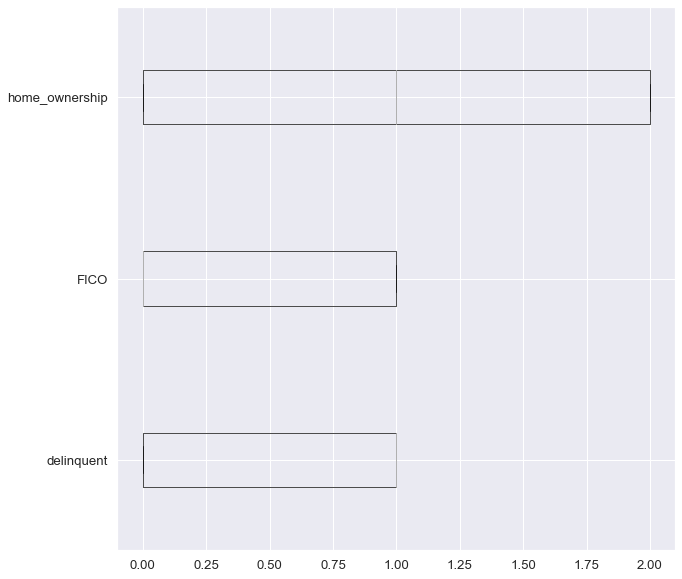

In [63]:
plt.figure(figsize=(10,10))
df[['delinquent','FICO','home_ownership']].boxplot(vert=0)

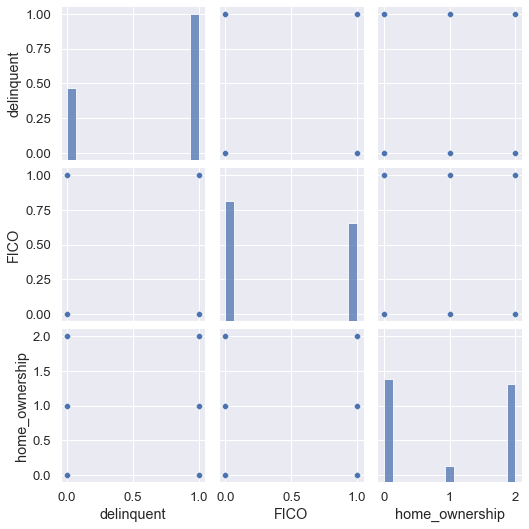

In [64]:
sns.pairplot(df[['delinquent','FICO','home_ownership']])

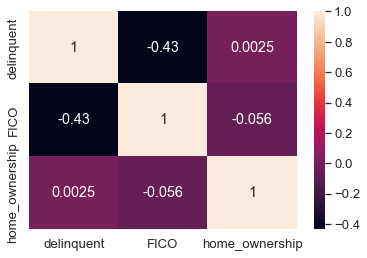

In [65]:

sns.set(font_scale=1.2)
sns.heatmap(df[['delinquent','FICO','home_ownership']].corr(), annot=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [15]:
le = LabelEncoder()

In [16]:
df['delinquent'] = le.fit_transform(df['delinquent'])
df['term'] = le.fit_transform(df['term'])
df['gender'] = le.fit_transform(df['gender'])
df['age'] = le.fit_transform(df['age'])
df['FICO'] = le.fit_transform(df['FICO'])
df['purpose'] = le.fit_transform(df['purpose'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])

In [17]:
df.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,1,0,0,1,0,1,0
1,2,0,0,0,0,1,2,0,1
2,3,1,1,0,0,1,2,1,0
3,4,1,1,0,0,0,0,1,0
4,5,1,1,0,0,1,2,1,0


In [18]:
df.drop('Sdelinquent',axis=1,inplace=True)

In [19]:
df.head()

,ID,delinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,0,0,1,0,1,0
1,2,0,0,0,1,2,0,1
2,3,1,0,0,1,2,1,0
3,4,1,0,0,0,0,1,0
4,5,1,0,0,1,2,1,0


In [20]:
x = df.drop('delinquent',axis=1)
x

,ID,term,gender,purpose,home_ownership,age,FICO
0,1,0,0,1,0,1,0
1,2,0,0,1,2,0,1
2,3,0,0,1,2,1,0
3,4,0,0,0,0,1,0
4,5,0,0,1,2,1,0
...,...,...,...,...,...,...,...
11543,11544,1,1,6,0,1,0
11544,11545,0,1,1,2,0,0
11545,11546,0,0,4,0,0,1
11546,11547,0,0,1,2,0,0


In [21]:
y = df['delinquent']
y

0        1
1        0
2        1
3        1
4        1
        ..
11543    0
11544    1
11545    0
11546    1
11547    1
Name: delinquent, Length: 11548, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=30 , random_state=1)

In [23]:
x_train.shape


(11518, 7)

In [24]:
x_test.shape




(30, 7)

In [25]:
y_train.shape


(11518,)

In [26]:
y_test.shape

(30,)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [28]:
ytest_pred = lr.predict(x_test)
ytrain_pred = lr.predict(x_train)

In [42]:
from sklearn.metrics import auc,classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [34]:
cm = confusion_matrix(y_test , ytest_pred)
cm

array([[ 8,  3],
       [ 3, 16]], dtype=int64)

In [35]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.84      0.84      0.84        19

    accuracy                           0.80        30
   macro avg       0.78      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



In [36]:
log1 = lr.predict_proba(x_test)
log1 = log1[:,1]
auc =  metrics.roc_auc_score(y_test,log1)
auc

0.8373205741626795

In [72]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [73]:
ytest_pred2 = model2.predict(x_test)
ytrain_pred2 = model2.predict(x_train)

In [74]:
cm = confusion_matrix(y_test,ytest_pred2)
cm

array([[ 7,  4],
       [ 2, 17]], dtype=int64)

In [75]:
print(classification_report(y_test,ytest_pred2))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.81      0.89      0.85        19

    accuracy                           0.80        30
   macro avg       0.79      0.77      0.78        30
weighted avg       0.80      0.80      0.80        30



In [76]:
log1 = lr.predict_proba(x_test)
log1 = log1[:,1]
auc =  metrics.roc_auc_score(y_test,log1)
auc

0.8373205741626795